# Project steps:

# Import all the require libraries:

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# 1.Problem statement:

# 2.Data Gathering:

In [2]:
df=pd.read_csv('Iris.csv')        
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.shape

(150, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df.axes

[RangeIndex(start=0, stop=150, step=1),
 Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
        'Species'],
       dtype='object')]

In [7]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# 3.Exploratory Data Analysis(EDA):

In [11]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


<AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

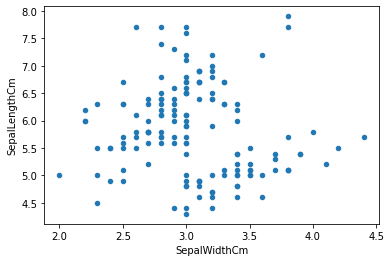

In [14]:
df.plot(x='SepalWidthCm',y='SepalLengthCm',kind='scatter')    # data point graph of two attributes

<Figure size 360x360 with 0 Axes>

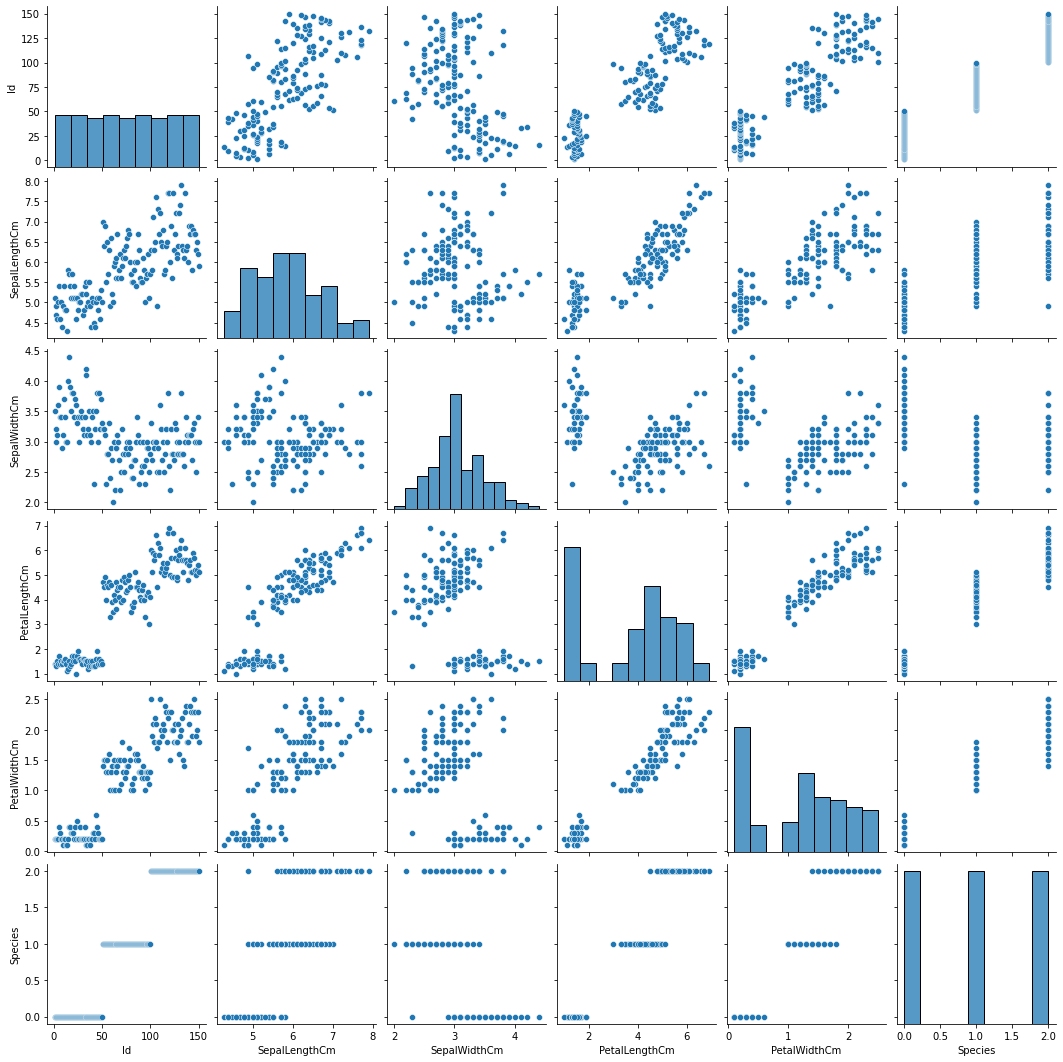

In [15]:
plt.figure(figsize=(5,5))             # fig size
sns.pairplot(df,kind='scatter')       # pair plot(data points graph) between each atrribute

In [16]:
df.corr()    # correlation between ecah attribute

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:>

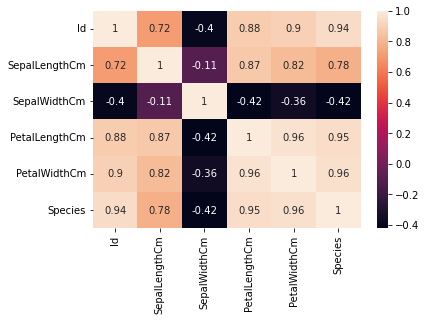

In [17]:
sns.heatmap(df.corr(),annot=True) # annot=True to show R correlation values in box

<AxesSubplot:>

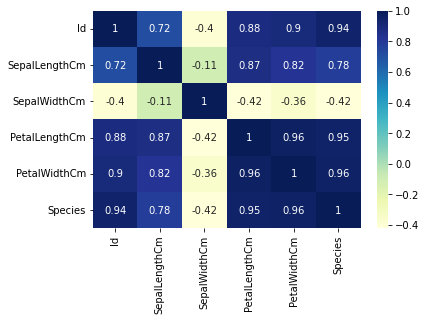

In [18]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')    # cmap='YlGnBu'  to change the graph box colurs

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


# 4.Feature Engineering:

# 5.Feature Selection:

In [20]:
df.drop(['Id'],axis=1,inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# 6.Model Building/Training:

# 6.1 Splitting Dataset:

In [22]:
x=df.drop(['SepalLengthCm'],axis=1)     # here we splitted our data in x input/Independent and y target variable
y=df['SepalLengthCm']

In [23]:
# spliting data in tarin and test dataset

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [25]:
x_train.shape

(120, 4)

In [26]:
x_test.shape

(30, 4)

In [27]:
y_train.shape

(120,)

In [28]:
y_test.shape

(30,)

# 6.2  Instantiatin Linear Regression (Required ML model) Model:

In [29]:
model=LinearRegression()   # initializing LinearRegressin Model to model object
model

LinearRegression()

# 6.3 Train Model:

In [30]:
model.fit(x_train,y_train)           # fit model on train data

LinearRegression()

# 7. Model Evaluation:

# 7.1 Prediction:

In [31]:
y_pred=model.predict(x_test)
y_pred

array([5.09192877, 4.93149358, 6.25720518, 5.02467945, 7.72619147,
       6.58803407, 6.08751945, 5.47306316, 4.97011483, 6.65064945,
       5.96358461, 5.36185069, 6.79865775, 6.40915979, 6.23704035,
       4.7172364 , 5.78471033, 6.2944135 , 4.90639933, 4.63294359,
       6.12188157, 6.2944135 , 6.62170856, 4.84227135, 7.13895033,
       5.93666494, 5.37526068, 5.18297641, 6.48950629, 5.84732571])

In [32]:
y_test

14     5.8
98     5.1
75     6.6
16     5.4
131    7.9
56     6.3
141    6.9
44     5.1
29     4.7
120    6.9
94     5.6
5      5.4
102    7.1
51     6.4
78     6.0
42     4.4
92     5.8
66     5.6
31     5.4
35     5.0
90     5.5
84     5.4
77     6.7
40     5.0
125    7.2
99     5.7
33     5.5
19     5.1
73     6.1
146    6.3
Name: SepalLengthCm, dtype: float64

In [33]:
y_train

91     6.1
135    7.7
69     5.6
128    6.4
114    5.8
      ... 
133    6.3
137    6.4
72     6.3
140    6.7
37     4.9
Name: SepalLengthCm, Length: 120, dtype: float64

# 7.2 Calculate Evaluation parameter:

# 1.Mean Squared Error(MSE):

In [34]:
mse=mean_squared_error(y_test,y_pred)
mse

0.15781531046414615

In [35]:
mse=mean_squared_error(y_pred,y_test)
mse

0.15781531046414615

# 2. Root Mean Squared Error(RMSE):

In [36]:
rmse=np.sqrt(mse)
rmse

0.39725975188048707

# 3. r2_score:

In [37]:
r2_score=r2_score(y_test,y_pred)
r2_score

0.7588110183264591

# 4. Mean Absolute Error(MAE):

In [38]:
MAE=mean_absolute_error(y_pred,y_test)
MAE

0.32327812415709084

# Prediction for Training Dataset:

In [39]:
y_pred_train=model.predict(x_train)
y_pred_train

array([6.4257908 , 6.87307439, 5.69012886, 6.43103303, 5.86831551,
       5.17268776, 5.5655064 , 4.9162755 , 6.26396001, 6.56875268,
       6.46148652, 4.92656416, 5.86354423, 6.62965965, 6.41550214,
       7.31792428, 5.35156203, 5.0310218 , 4.63969842, 5.66362169,
       5.00056831, 4.88935584, 7.88490092, 6.43456686, 7.21970931,
       6.38394854, 5.89794403, 6.4768216 , 7.40533842, 6.18278854,
       5.08486112, 5.80024122, 5.92486369, 4.7338674 , 4.7172364 ,
       6.66728045, 4.86919101, 6.09698313, 6.28614607, 6.31457832,
       6.27383618, 6.61385362, 6.01269032, 5.31435371, 5.64938672,
       6.16262371, 6.60273999, 5.1167102 , 6.86673204, 5.68025269,
       5.17268776, 4.87553336, 5.44926484, 6.80219158, 4.6024901 ,
       6.58096642, 6.21495044, 6.26556875, 5.05794146, 4.97052731,
       6.02054527, 4.87553336, 6.94666606, 6.16262371, 7.38870742,
       6.11443911, 5.90267763, 6.51251732, 7.1231443 , 5.57257405,
       5.48013081, 5.75779067, 4.15379358, 5.54846291, 6.68895

In [46]:
y_train

91     6.1
135    7.7
69     5.6
128    6.4
114    5.8
      ... 
133    6.3
137    6.4
72     6.3
140    6.7
37     4.9
Name: SepalLengthCm, Length: 120, dtype: float64

# Residual:

In [47]:
residuals=y_test-y_pred

In [48]:
residuals

14     0.708071
98     0.168506
75     0.342795
16     0.375321
131    0.173809
56    -0.288034
141    0.812481
44    -0.373063
29    -0.270115
120    0.249351
94    -0.363585
5      0.038149
102    0.301342
51    -0.009160
78    -0.237040
42    -0.317236
92     0.015290
66    -0.694413
31     0.493601
35     0.367056
90    -0.621882
84    -0.894413
77     0.078291
40     0.157729
125    0.061050
99    -0.236665
33     0.124739
19    -0.082976
73    -0.389506
146    0.452674
Name: SepalLengthCm, dtype: float64

In [49]:
df_res=pd.DataFrame(residuals)
df_res

,SepalLengthCm
14,0.708071
98,0.168506
75,0.342795
16,0.375321
131,0.173809
56,-0.288034
141,0.812481
44,-0.373063
29,-0.270115
120,0.249351


<AxesSubplot:xlabel='SepalLengthCm', ylabel='Density'>

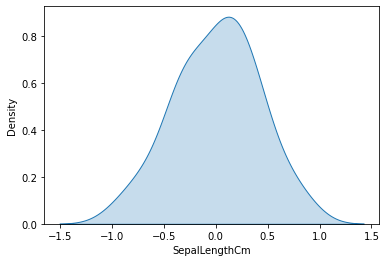

In [50]:
sns.kdeplot(df_res['SepalLengthCm'],fill=True)

In [51]:
mse=mean_squared_error(y_train,y_pred_train)
mse

0.08141477898407086

In [52]:
rmse=np.sqrt(mse)
rmse

0.2853327513344216

In [53]:
r2_score=r2_score(y_train,y_pred_train)
r2_score

0.8816124649726118

In [57]:
mae=mean_absolute_error(y_train,y_pred_train)
mae

0.22951794887787844